## 业务场景

判断是否潜在合约客户 vs 单卡客户：


## 字段信息：
名称       | 说明   | 类型  |
--------------|---------|--------|-----
user_id     |用户标识 | int   |
service_kind  |业务类型 | string | 2G\3G\4G
call_duration|主叫时长（分）|
called_duration|被叫时长（分）
in_package_flux|免费流量
out_package_flux|计费流量
|月均上网时长（分）|
net_duration |入网时长（天） |long
last_recharge_value|最近一次缴费金额（元）
total_recharge_value|总缴费金额(元)|
total_recharge_count|缴费次数
contractuser_flag|是否潜在合约用户


silent_serv_flag|是否三无用户|int|0：否，1：是，三无：无月租费，无最低消费，无来电显示

pay_type    | 付费类型 |int   | 0：预付费，1：后付费



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 模拟生成运营商数据

In [2]:
from sklearn import datasets

In [3]:
sample_size = 10000
X,y = datasets.make_hastie_10_2(sample_size,random_state=111)
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


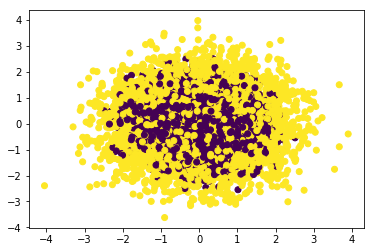

In [4]:
#生成数据可视化
plt.scatter(X[:,0],X[:,1],c=y)

['套餐价格','话音用量','数据用量','月均上网时长','在网时长',
 '当前终端使用时长','消息业务用量','月均使用视频类APP次数','视频类APP流量','余额']

In [5]:
#数据的变形转换
df = pd.DataFrame(X,columns=['主叫时长（分）','被叫时长（分）','免费流量','计费流量',
                             '月均上网时长（分）','入网时长（天）',
                             '最近一次缴费金额（元）','总缴费金额(元)','缴费次数','余额'])
# '入网时间',
df['是否潜在合约用户'] = y
df.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,-1.133838,0.384319,1.496554,-0.355382,-0.787534,-0.459439,-0.059169,-0.354174,-0.735523,-1.183940,-1.0
1,0.238894,-0.589920,-1.440585,0.773703,-1.027967,-0.090986,0.492003,0.424672,1.283049,0.315986,-1.0
2,-0.408082,-0.067948,-0.952427,-0.110677,0.570594,0.915420,-1.669341,0.482714,-0.310473,2.394690,1.0
3,1.550931,-0.646465,-0.928937,-1.654976,0.350193,-0.141757,0.521082,-0.020901,-1.743844,-0.799159,1.0
4,-1.303570,0.178105,-0.334402,-0.306027,-0.332406,1.962947,0.719242,1.142887,2.082877,-1.284648,1.0


In [6]:
df['是否潜在合约用户'].value_counts()

 1.0    5003
-1.0    4997
Name: 是否潜在合约用户, dtype: int64

In [7]:
#构建离散变量：业务类型

#对于潜在合约客户，我们主要将其设置为3G、4G用户
cond_positive = df['是否潜在合约用户']==1

positive_num = sum(cond_positive)
# positive_num
df.loc[cond_positive,'业务类型'] = np.random.randint(3,5,size = positive_num)
negative_num = len(cond_positive)-positive_num
df.loc[~cond_positive,'业务类型'] = np.random.randint(2,5,size = negative_num)
df.head()

# x = np.random.randint(0,2,1000)

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户,业务类型
0,-1.133838,0.384319,1.496554,-0.355382,-0.787534,-0.459439,-0.059169,-0.354174,-0.735523,-1.183940,-1.0,4.0
1,0.238894,-0.589920,-1.440585,0.773703,-1.027967,-0.090986,0.492003,0.424672,1.283049,0.315986,-1.0,2.0
2,-0.408082,-0.067948,-0.952427,-0.110677,0.570594,0.915420,-1.669341,0.482714,-0.310473,2.394690,1.0,4.0
3,1.550931,-0.646465,-0.928937,-1.654976,0.350193,-0.141757,0.521082,-0.020901,-1.743844,-0.799159,1.0,4.0
4,-1.303570,0.178105,-0.334402,-0.306027,-0.332406,1.962947,0.719242,1.142887,2.082877,-1.284648,1.0,4.0


### 将其转化为现实场景的取值区间

In [8]:
# np.maximum(np.round((df.loc[cond_positive,'主叫时长（分）']+5)*20),0)
# np.maximum(1,0)

In [9]:
def transform(mean_pos,std_pos,mean_neg,std_neg):
    df.loc[cond_positive,column] = np.maximum(np.round((df.loc[cond_positive,column]+mean_pos)*std_pos),0)
    df.loc[~cond_positive,column] =np.maximum(np.round((df.loc[~cond_positive,column]+mean_neg)*std_neg),0)

In [10]:
columns =df.columns.values.tolist()
for column in columns:
    
    if column in ['主叫时长（分）','被叫时长（分）']:
        #分类做处理
#         df.loc[cond_positive,column] = np.round((df.loc[cond_positive,column]+5)*20)
#         df.loc[~cond_positive,column] = np.round((df.loc[~cond_positive,column]+3)*20)
        transform(5,20,5,18)
    elif column in ['免费流量']:
        transform(40,10,38,10)
    elif column in ['计费流量']:
        transform(1,50,1,20)    
    elif column in ['月均上网时长（分）']:
        transform(5,24,4,20) 
    elif column in ['入网时长（天）']:
        transform(5,37,5,37)
    elif column in ['最近一次缴费金额（元）','余额']:
        transform(2,25,3,20)
    elif column in ['总缴费金额(元)']:
        transform(5,100,5,100)
    elif column in ['缴费次数']:
        transform(3,3,3,3)
#         df[column] = (df.loc[:,column]+1)*100
df.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户,业务类型
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,-1.0,4.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,-1.0,2.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1.0,4.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1.0,4.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1.0,4.0


In [11]:
def service_labeling(cell):
    if cell==2:
        return '2G'
    elif cell==3:
        return '3G'
    elif cell==4:
        return '4G'
df['业务类型']= df['业务类型'].map(service_labeling)
df['是否潜在合约用户'] = df['是否潜在合约用户'].map(lambda x:0 if x==-1 else 1)
df.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户,业务类型
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0,4G
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0,2G
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1,4G
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1,4G
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1,4G


In [12]:
df['用户标识'] = np.random.randint(60000,70000,sample_size)
df.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户,业务类型,用户标识
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0,4G,60224
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0,2G,64411
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1,4G,66574
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1,4G,67467
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1,4G,61579


In [13]:
### df.columns.tolist()
new_df = df[[ '用户标识', '业务类型','主叫时长（分）',
 '被叫时长（分）',
 '免费流量',
 '计费流量',
 '月均上网时长（分）',
 '入网时长（天）',
 '最近一次缴费金额（元）',
 '总缴费金额(元)',
 '缴费次数',
 '余额',
 '是否潜在合约用户']]
new_df.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,60224,4G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64411,2G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,66574,4G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,67467,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,61579,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


## 数据预处理

### 类别特征编码

In [26]:
data  = new_df

data.to_csv('data_carrier_svm.csv')
data.head()

,用户标识,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,是否潜在合约用户
0,60224,4G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0
1,64411,2G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,0
2,66574,4G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,1
3,67467,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,1
4,61579,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,1


In [15]:
X = data.loc[:,'业务类型':'余额']
y= data.loc[:,'是否潜在合约用户']
print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}'.format(y.shape))

The shape of X is (10000, 11)
The shape of y is (10000,)


In [16]:
X.head()

,业务类型,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额
0,4G,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0
1,2G,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0
2,4G,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0
3,4G,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0
4,4G,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
def service_mapping(cell):
    if cell=='2G':
        return 2
    elif cell=='3G':
        return 3
    elif cell=='4G':
        return 4

#将业务类型的string型值映射为整数型
service_map = X['业务类型'].map(service_mapping)
service = pd.DataFrame(service_map)
# service_df
#使用OncHotEncoder转化类型特征为0/1编码的多维特征
enc = OneHotEncoder()
service_enc = enc.fit_transform(service).toarray()
service_enc

#0/1编码的多维特征的名称
service_names = enc.active_features_.tolist()
service_newname=[str(x)+'G' for x in service_names]

service_df = pd.DataFrame(service_enc,columns=service_newname)
service_df.head()
X_enc = pd.concat([X,service_df],axis = 1).drop('业务类型',axis=1)
X_enc.head()

,主叫时长（分）,被叫时长（分）,免费流量,计费流量,月均上网时长（分）,入网时长（天）,最近一次缴费金额（元）,总缴费金额(元),缴费次数,余额,2G,3G,4G
0,70.0,97.0,395.0,13.0,64.0,168.0,59.0,465.0,7.0,36.0,0.0,0.0,1.0
1,94.0,79.0,366.0,35.0,59.0,182.0,70.0,542.0,13.0,66.0,1.0,0.0,0.0
2,92.0,99.0,390.0,44.0,134.0,219.0,8.0,548.0,8.0,110.0,0.0,0.0,1.0
3,131.0,87.0,391.0,0.0,128.0,180.0,63.0,498.0,4.0,30.0,0.0,0.0,1.0
4,74.0,104.0,397.0,35.0,112.0,258.0,68.0,614.0,15.0,18.0,0.0,0.0,1.0


### 数据归一化

In [19]:
from sklearn.preprocessing import normalize
X_normalized = normalize(X_enc)
X_normalized[:2]

array([[0.1075175 , 0.14898853, 0.60670587, 0.01996753, 0.09830171,
        0.25804199, 0.09062189, 0.71422336, 0.01075175, 0.05529471,
        0.        , 0.        , 0.00153596],
       [0.13427845, 0.11285104, 0.52282887, 0.0499973 , 0.08428116,
        0.25998594, 0.09999459, 0.77424384, 0.01857042, 0.09428062,
        0.00142849, 0.        , 0.        ]])

In [20]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda2\envs\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\envs\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [21]:
#分割训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X_normalized,y,test_size = 0.2, random_state=112)
print('The shape of X_train is {0}'.format(X_train.shape))
print('The shape of X_test is {0}'.format(X_test.shape))

The shape of X_train is (8000, 13)
The shape of X_test is (2000, 13)


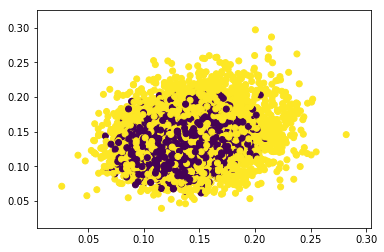

In [22]:
#生成数据可视化
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

### 训练简单模型: 线性超平面模型

In [23]:
#模型实例化
linear_clf = svm.LinearSVC()
#在训练集上训练模型
linear_clf.fit(X_train,y_train)

#在测试集上预测
y_pred = linear_clf.predict(X_test)

#计算准备；率
score = metrics.accuracy_score(y_test,y_pred)
print('The accuracy score of the model is: {0}'.format(score))

#查看混淆举证
metrics.confusion_matrix(y_test,y_pred)

The accuracy score of the model is: 0.864


array([[935, 103],
       [169, 793]], dtype=int64)

### 训练核函数=rbf的SVM算法：调参

In [ ]:
C_range = np.logspace(-5,5,5)
gamma_range = np.logspace(-9,2,10)

clf = svm.SVC(kernel='rbf',cache_size=1000,random_state=117)
param_grid = {'C':C_range,
             'gamma':gamma_range}
grid = GridSearchCV(clf,param_grid=param_grid,scoring= 'accuracy',n_jobs=2,cv =5)
grid.fit(X_train,y_train)


In [ ]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

## 使用最有超参再次进行训练

In [ ]:
#instance with the best parameters
clf_best = svm.SVC(kernel="rbf",C=1,probability=True)

#fit on the trainingt data
clf_best.fit(X2_train,y2_train)

#predict on the testing data
y2_pred = clf_best.predict(X2_test)



### 模型评估

In [ ]:
#caculate the accuracy score on testing data
accuracy = metrics.accuracy_score(y2_test,y2_pred)
print("The accuracy is %f"%accuracy)

#get the confusion matrics
metrics.confusion_matrix(y2_test,y2_pred)

In [ ]:
# store the predicted probabilities for class 1
y2_pred_prob = clf_best.predict_proba(X2_test)[:, 1]

# IMPORTANT: first argument is true values, second argument is predicted probabilities
#fpr: false positive rate (=1- specifity), tpr = true postive rate
fpr, tpr, thresholds = metrics.roc_curve(y2_test, y2_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)